In [ ]:
# Load Packages
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data as dt
import matplotlib.pyplot as plt
#import yfinance as fyf
import datetime as dt
%matplotlib inline

In [ ]:
# Install yfinance and matplotlib package
!pip install yfinance
!pip install matplotlib
# Import yfinance and matplotlib
import yfinance as yf  
import matplotlib.pyplot as plt
# Get the data for the SPY ETF by specifying the stock ticker, start date, and end date
stocks= ['NAUKRI.BO', 'LTI.BO', 'BIOCON.BO', 'GLENMARK.BO', 'COLPAL.BO', 'PGHH.BO', 'BANKINDIA.BO', 'IDBI.BO']
data = yf.download(stocks,'2015-01-01','2021-08-06')
# Plot the close prices
#data["Adj Close"].plot()
#plt.show()

     |████████████████████████████████| 6.3 MB 7.8 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
[*********************100%***********************]  8 of 8 completed


In [ ]:
df = data["Adj Close"]
df.head()

,BANKINDIA.BO,BIOCON.BO,COLPAL.BO,GLENMARK.BO,IDBI.BO,LTI.BO,NAUKRI.BO,PGHH.BO
Date,,,,,,,,
2015-01-01,296.090851,69.012634,798.829590,755.691528,74.078133,NaN,831.910339,5184.933594
2015-01-02,299.544495,69.499336,815.659485,748.382690,76.056183,NaN,832.348816,5208.555664
2015-01-05,298.717560,69.710220,811.015137,731.815857,75.215515,NaN,822.070435,5209.892578
2015-01-06,283.735474,67.171326,815.836365,702.823792,71.111046,NaN,812.912476,5167.282227
2015-01-07,280.233154,65.678802,827.535339,700.338806,70.023117,NaN,821.047546,5207.664551


In [ ]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,BANKINDIA.BO,BIOCON.BO,COLPAL.BO,GLENMARK.BO,IDBI.BO,LTI.BO,NAUKRI.BO,PGHH.BO
BANKINDIA.BO,0.000852,0.000151,0.000057,0.000185,0.000479,0.000063,0.000074,0.000066
BIOCON.BO,0.000151,0.000444,0.000062,0.000160,0.000159,0.000104,0.000070,0.000038
COLPAL.BO,0.000057,0.000062,0.000194,0.000062,0.000065,0.000043,0.000066,0.000028
GLENMARK.BO,0.000185,0.000160,0.000062,0.000547,0.000201,0.000105,0.000091,0.000037
IDBI.BO,0.000479,0.000159,0.000065,0.000201,0.000933,0.000082,0.000078,0.000074
LTI.BO,0.000063,0.000104,0.000043,0.000105,0.000082,0.000439,0.000083,0.000033
NAUKRI.BO,0.000074,0.000070,0.000066,0.000091,0.000078,0.000083,0.000593,0.000039
PGHH.BO,0.000066,0.000038,0.000028,0.000037,0.000074,0.000033,0.000039,0.000166


In [ ]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,BANKINDIA.BO,BIOCON.BO,COLPAL.BO,GLENMARK.BO,IDBI.BO,LTI.BO,NAUKRI.BO,PGHH.BO
BANKINDIA.BO,1.000000,0.246005,0.139924,0.271232,0.537108,0.100001,0.104665,0.174385
BIOCON.BO,0.246005,1.000000,0.211162,0.324408,0.247760,0.225147,0.136355,0.139678
COLPAL.BO,0.139924,0.211162,1.000000,0.189794,0.153039,0.144859,0.193206,0.158010
GLENMARK.BO,0.271232,0.324408,0.189794,1.000000,0.281116,0.207039,0.160205,0.124237
IDBI.BO,0.537108,0.247760,0.153039,0.281116,1.000000,0.125909,0.104463,0.188771
LTI.BO,0.100001,0.225147,0.144859,0.207039,0.125909,1.000000,0.157292,0.121455
NAUKRI.BO,0.104665,0.136355,0.193206,0.160205,0.104463,0.157292,1.000000,0.124727
PGHH.BO,0.174385,0.139678,0.158010,0.124237,0.188771,0.121455,0.124727,1.000000


In [ ]:
# Randomly weighted portfolio's variance
w = {'NAUKRI.BO' : 0.15, 'LTI.BO' : 0.2, 'BIOCON.BO' : 0.1, 'GLENMARK.BO': 0.1, 'COLPAL.BO' : 0.1, 'PGHH.BO': 0.1, 'BANKINDIA.BO': 0.15, 'IDBI.BO' : 0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.00021387654624571129

In [ ]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

BANKINDIA.BO   -0.008054
BIOCON.BO       0.345312
COLPAL.BO       0.115884
GLENMARK.BO    -0.008333
IDBI.BO        -0.115410
LTI.BO          0.539171
NAUKRI.BO       0.403909
PGHH.BO         0.171481
dtype: float64

In [ ]:
# Portfolio returns
w = [0.15, 0.2,0.1,0.1,0.1,0.1,0.15, 0.2]
port_er = (w*ind_er).sum()
port_er

0.21586799309905513

In [ ]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

BANKINDIA.BO    0.461580
BIOCON.BO       0.332991
COLPAL.BO       0.220468
GLENMARK.BO     0.369820
IDBI.BO         0.483021
LTI.BO          0.331229
NAUKRI.BO       0.385164
PGHH.BO         0.203599
dtype: float64

In [ ]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
BANKINDIA.BO,-0.008054,0.461580
BIOCON.BO,0.345312,0.332991
COLPAL.BO,0.115884,0.220468
GLENMARK.BO,-0.008333,0.369820
IDBI.BO,-0.115410,0.483021
LTI.BO,0.539171,0.331229
NAUKRI.BO,0.403909,0.385164
PGHH.BO,0.171481,0.203599


In [ ]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [ ]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)
    data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
    portfolios  = pd.DataFrame(data)
    
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,BANKINDIA.BO weight,BIOCON.BO weight,COLPAL.BO weight,GLENMARK.BO weight,IDBI.BO weight,LTI.BO weight,NAUKRI.BO weight,PGHH.BO weight
0,0.243083,0.206038,0.008146,0.189082,0.048408,0.154810,0.129912,0.129612,0.259598,0.080431
1,0.174145,0.206796,0.094388,0.158691,0.129495,0.110805,0.190913,0.135809,0.103187,0.076711
2,0.247503,0.190653,0.168613,0.163043,0.078115,0.089431,0.024753,0.200879,0.136027,0.139139
3,0.152410,0.201237,0.030629,0.211980,0.065870,0.210883,0.148754,0.011426,0.127506,0.192952
4,0.257491,0.182482,0.106702,0.153308,0.150117,0.073195,0.049043,0.264432,0.072564,0.130639


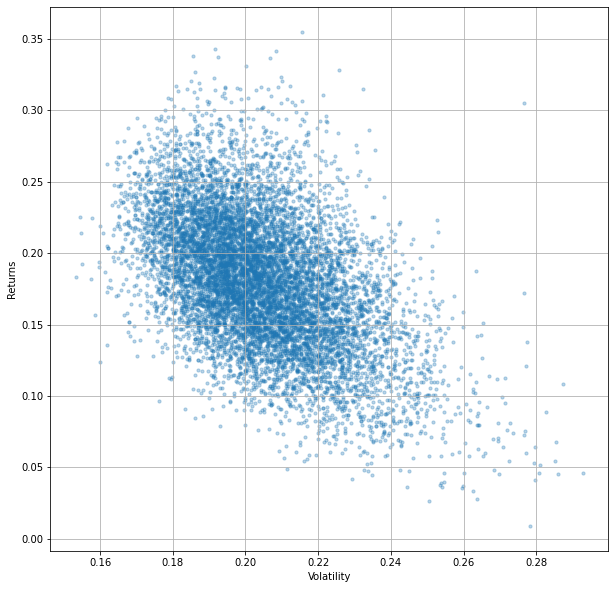

In [ ]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [ ]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns                0.183672
Volatility             0.153338
BANKINDIA.BO weight    0.042531
BIOCON.BO weight       0.079146
COLPAL.BO weight       0.335670
GLENMARK.BO weight     0.069702
IDBI.BO weight         0.036994
LTI.BO weight          0.078340
NAUKRI.BO weight       0.082056
PGHH.BO weight         0.275561
Name: 9118, dtype: float64

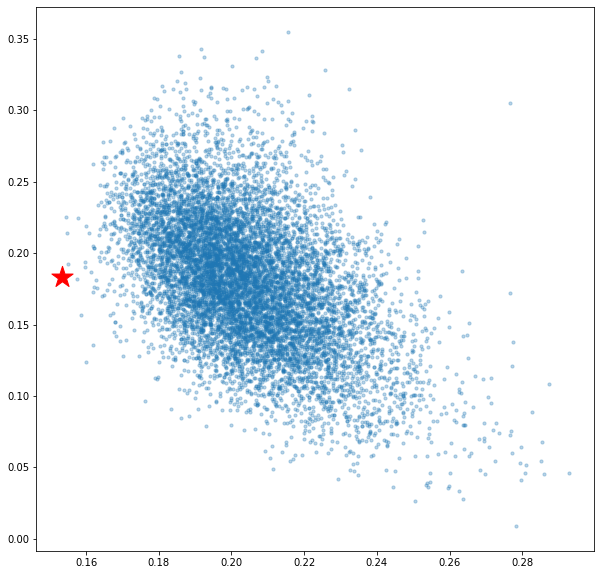

In [ ]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [ ]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns                0.337832
Volatility             0.185525
BANKINDIA.BO weight    0.010880
BIOCON.BO weight       0.154207
COLPAL.BO weight       0.157422
GLENMARK.BO weight     0.030991
IDBI.BO weight         0.012635
LTI.BO weight          0.299280
NAUKRI.BO weight       0.212567
PGHH.BO weight         0.122019
Name: 4953, dtype: float64

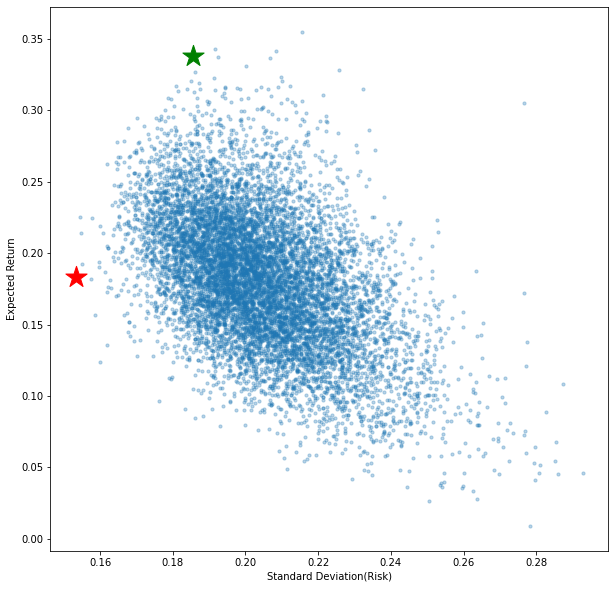

In [ ]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.xlabel('Standard Deviation(Risk)')
plt.ylabel('Expected Return')
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)